In [1]:
!gdown  https://drive.google.com/uc?id=1cqgbAhpydRBaMEqZNWm9XH-Io-A0ZALL

Downloading...
From: https://drive.google.com/uc?id=1cqgbAhpydRBaMEqZNWm9XH-Io-A0ZALL
To: /content/root2ai - Data.csv
100% 1.90M/1.90M [00:00<00:00, 61.2MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input, Dense, LSTM, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.utils import shuffle
%matplotlib inline

In [3]:
df = pd.read_csv('/content/root2ai - Data.csv')

In [4]:
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [5]:
df = shuffle(df,random_state = 42)

In [6]:
df.head()

,Text,Target
15437,when digital currency regime central refer tra...,FinTech
8178,basic service control already control current ...,FinTech
21621,Other state regulators Washington State Depart...,Reg Tech
7735,page engagement regulator activity,Cyber Security
18836,income factor affecting investment decision,Robo Advising


In [7]:
df = df.reset_index()

In [8]:
df = df.drop(['index'],axis = 1)

In [9]:
df.head()

,Text,Target
0,when digital currency regime central refer tra...,FinTech
1,basic service control already control current ...,FinTech
2,Other state regulators Washington State Depart...,Reg Tech
3,page engagement regulator activity,Cyber Security
4,income factor affecting investment decision,Robo Advising


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [11]:
df['Text'].isnull().sum()

3

In [12]:
df.isnull().sum()

Text      3
Target    0
dtype: int64

In [13]:
df.dropna(axis = 0,inplace = True)

In [14]:
df = df.reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22701 non-null  object
dtypes: object(2)
memory usage: 354.8+ KB


In [16]:
df.tail()

,Text,Target
22696,however expressed problem offering even financ...,FinTech
22697,BANKER BANKTHINK,Reg Tech
22698,portmanteau word combining financial technology,Cyber Security
22699,without detailed discussion across large open ...,Blockchain
22700,they figured trend heading technology coming r...,FinTech


In [17]:
df['Target'].unique()

array(['FinTech', 'Reg Tech', 'Cyber Security', 'Robo Advising',
       'Bigdata', 'credit reporting', 'Data Security', 'Microservices',
       'Stock Trading', 'Blockchain', 'Neobanks'], dtype=object)

In [18]:
df['Target'].describe()

count       22701
unique         11
top       FinTech
freq         8551
Name: Target, dtype: object

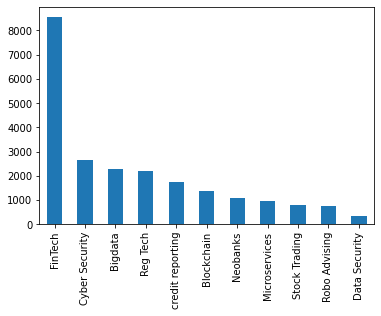

In [19]:
df['Target'].value_counts().plot.bar()
plt.show()

In [20]:
classes = list(df['Target'].unique())
len(classes)

11

In [21]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(df['Text']))
tokenized_train_comments = tokenizer.texts_to_sequences(list(df['Text']))

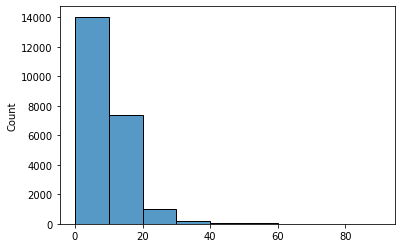

In [22]:
comment = [len(comment) for comment in tokenized_train_comments]
sns.histplot(comment,bins=np.arange(0,100,10))
plt.show()

In [23]:
len(tokenized_train_comments)

22701

In [24]:
tokenized_train_comments[:2]

[[539, 4, 232, 1115, 212, 1504, 1992, 2, 38, 259, 1029, 442, 1372],
 [622, 28, 287, 138, 287, 144, 146, 252, 655, 860]]

In [25]:
labelencoder_X = LabelEncoder()
df['Target'] = labelencoder_X.fit_transform(df['Target'])

In [26]:
df['Target'].unique()

array([ 4,  7,  2,  8,  0, 10,  3,  5,  9,  1,  6])

In [27]:
y = df['Target'].values
y_target = to_categorical(y,num_classes = 11)

In [28]:
y_target[0:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [29]:
X = pad_sequences(tokenized_train_comments,maxlen = 40)
# X_test = pad_sequences(X_test,maxlen = 40)

In [30]:
X.shape

(22701, 40)

In [31]:
#Model
inputlayer = Input(shape = 40)
embedlayer = Embedding(input_dim = 20000, output_dim = 128)(inputlayer)
lstmLayer = LSTM(units = 60, return_sequences = True)(embedlayer)
mxpool = GlobalMaxPooling1D()(lstmLayer)
dropout1 = Dropout(0.1)(mxpool)
fcLayer1 = Dense(units = 50, activation = 'relu')(dropout1)
dropout2 = Dropout(0.1)(fcLayer1)
fclayer2 = Dense(units = 11, activation = 'sigmoid')(dropout2)
model = Model(inputs = inputlayer, outputs = fclayer2)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 40, 128)           2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 40, 60)            45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0     

In [32]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [33]:
model.fit(X,y_target,batch_size = 32,epochs = 10,validation_split = 0.2)

Epoch 1/10
568/568 [==============================] - 50s 30ms/step - loss: 0.3286 - accuracy: 0.2970 - val_loss: 0.2540 - val_accuracy: 0.3704
Epoch 2/10
568/568 [==============================] - 17s 29ms/step - loss: 0.2458 - accuracy: 0.4207 - val_loss: 0.2022 - val_accuracy: 0.5519
Epoch 3/10
568/568 [==============================] - 16s 29ms/step - loss: 0.1893 - accuracy: 0.5820 - val_loss: 0.1784 - val_accuracy: 0.5988
Epoch 4/10
568/568 [==============================] - 17s 29ms/step - loss: 0.1553 - accuracy: 0.6658 - val_loss: 0.1693 - val_accuracy: 0.6311
Epoch 5/10
568/568 [==============================] - 16s 29ms/step - loss: 0.1329 - accuracy: 0.7221 - val_loss: 0.1672 - val_accuracy: 0.6391
Epoch 6/10
568/568 [==============================] - 16s 29ms/step - loss: 0.1140 - accuracy: 0.7654 - val_loss: 0.1696 - val_accuracy: 0.6402
Epoch 7/10
568/568 [==============================] - 16s 29ms/step - loss: 0.1010 - accuracy: 0.7910 - val_loss: 0.1703 - val_accuracy: